In [2]:
import pandas as pd

## Contexto do problema

Dataset obtido de https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

| coluna       | descrição                            | tipo da coluna |
|--------------|--------------------------------------|----------------|
| model        | modelo do carro                      | categórica     |
| year         | ano de registro                      | inteiro        |
| price        | preço em libras esterlinas           | número real    |
| transmission | tipo de transmissão                  | categórica     |
| mileage      | o quanto o carro já rodou, em milhas | número real    |
| fuelType     | tipo de combustível                  | categórica     |
| engineSize   | cilindrada, em litros                | número real    |

O target é o preço do carro.

## Análise Exploratória

A análise exploratória consiste em:

- Leitura dos dados e filtragem inicial. Nesta etapa não podemos fazer nada que possa enviesar a modelagem, um erro conhecido como *data snooping*.

- Separação treinamento-teste e análise exploratória dos dados de treinamento.

Neste notebook vamos nos limitar à leitura de dados e filtragem inicial.

### Lendo os dados

In [3]:
FILENAME = 'cclass.csv'

In [4]:
df = pd.read_csv(FILENAME)

Verificando se a leitura foi bem sucedida:

In [5]:
df.head()

,model,year,price,transmission,mileage,fuelType,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,C Class,2020,37899,Automatic,500,Diesel,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,2.0


Ajustando os tipos de dados:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3899 non-null   object 
 1   year          3899 non-null   int64  
 2   price         3899 non-null   int64  
 3   transmission  3899 non-null   object 
 4   mileage       3899 non-null   int64  
 5   fuelType      3899 non-null   object 
 6   engineSize    3899 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 213.4+ KB


In [7]:
df = df \
    .astype({ \
        'model': 'category', \
        'year': 'int', \
        'price': 'float', \
        'transmission': 'category', \
        'mileage': 'float', \
        'fuelType': 'category', \
        'engineSize': 'float', \
    })

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         3899 non-null   category
 1   year          3899 non-null   int32   
 2   price         3899 non-null   float64 
 3   transmission  3899 non-null   category
 4   mileage       3899 non-null   float64 
 5   fuelType      3899 non-null   category
 6   engineSize    3899 non-null   float64 
dtypes: category(3), float64(3), int32(1)
memory usage: 118.7 KB


### Filtragem inicial dos dados

Este arquivo contem apenas informação sobre o modelo "classe C" da Mercedes. Isto pode ser visto na coluna "model":

In [8]:
df['model'].value_counts()

model
 C Class    3899
Name: count, dtype: int64

Vamos remover essa coluna não-informativa:

In [9]:
df = df.drop(columns=['model'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          3899 non-null   int32   
 1   price         3899 non-null   float64 
 2   transmission  3899 non-null   category
 3   mileage       3899 non-null   float64 
 4   fuelType      3899 non-null   category
 5   engineSize    3899 non-null   float64 
dtypes: category(2), float64(3), int32(1)
memory usage: 114.8 KB


Vamos agora observar características descritivas simples para entender inicialmente o *dataset*.

In [11]:
df.select_dtypes(include='category').describe()

,transmission,fuelType
count,3899,3899
unique,4,4
top,Semi-Auto,Diesel
freq,2071,2340


In [12]:
df.select_dtypes(include='number').describe()

,year,price,mileage,engineSize
count,3899.000000,3899.000000,3899.000000,3899.000000
mean,2017.338548,23674.286997,22395.709156,2.037394
std,2.213416,8960.218218,22630.438426,0.487769
min,1991.000000,1290.000000,1.000000,0.000000
25%,2016.000000,17690.000000,6000.000000,2.000000
50%,2018.000000,22980.000000,14640.000000,2.000000
75%,2019.000000,28900.000000,32458.500000,2.100000
max,2020.000000,88995.000000,173000.000000,6.200000


#### `transmission`

In [13]:
df['transmission'].value_counts()

transmission
Semi-Auto    2071
Automatic    1628
Manual        199
Other           1
Name: count, dtype: int64

Parece que temos um ponto estranho, de uma transmissão incomum:

In [14]:
df[df['transmission'] == 'Other']

,year,price,transmission,mileage,fuelType,engineSize
3815,2012,11995.0,Other,44644.0,Diesel,3.0


Vamos remover esse categoria de um ponto só:

In [15]:
df = df.drop(df[df['transmission'] == 'Other'].index)

In [16]:
df['transmission'] = df['transmission'].cat.remove_unused_categories()

In [17]:
df['transmission'].value_counts()

transmission
Semi-Auto    2071
Automatic    1628
Manual        199
Name: count, dtype: int64

E, por fim, não podemos esquecer que criamos uma limitação para nosso modelo: a transmissão tem que ser dos três tipos acima apenas.

#### `fuelType`

In [18]:
df['fuelType'].value_counts()

fuelType
Diesel    2339
Petrol    1402
Hybrid     151
Other        6
Name: count, dtype: int64

Parece que tem novamente uma categoria sub-representada

In [19]:
df[df['fuelType'] == 'Other']

,year,price,transmission,mileage,fuelType,engineSize
3564,2017,16000.0,Automatic,54011.0,Other,2.0
3567,2015,15000.0,Automatic,53400.0,Other,2.0
3570,2017,17400.0,Automatic,52897.0,Other,2.0
3698,2016,13850.0,Automatic,77814.0,Other,2.0
3806,2016,15200.0,Automatic,51380.0,Other,2.0
3888,2020,41995.0,Automatic,400.0,Other,2.0


Vamos remover essa categoria de baixa representação:

In [20]:
df = df.drop(df[df['fuelType'] == 'Other'].index)

In [21]:
df['fuelType'] = df['fuelType'].cat.remove_unused_categories()

In [22]:
df['fuelType'].value_counts()

fuelType
Diesel    2339
Petrol    1402
Hybrid     151
Name: count, dtype: int64

Novamente, criamos uma limitação para nosso modelo: apenas os tipos acima de combustível podem ser modelados.

#### `year`

In [23]:
df['year'].value_counts().sort_index()

year
1991       1
1995       1
1998       1
2002       4
2003       1
2004       3
2005       5
2006       3
2007       7
2008       8
2009       7
2010      10
2011      13
2012      25
2013      64
2014     136
2015     320
2016     543
2017     663
2018     362
2019    1590
2020     125
Name: count, dtype: int64

<Axes: ylabel='year'>

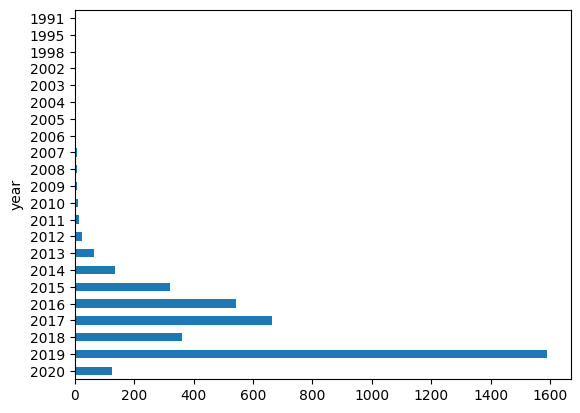

In [24]:
df['year'].value_counts().sort_index(ascending=False).plot(kind='barh')

Parece que temos poucos carros de anos anteriores a 2010. Vamos remover esses carros.

In [25]:
df = df.loc[df['year'] >= 2010, :]

In [26]:
df['year'].value_counts().sort_index()

year
2010      10
2011      13
2012      25
2013      64
2014     136
2015     320
2016     543
2017     663
2018     362
2019    1590
2020     125
Name: count, dtype: int64

Limitação: este modelo servirá apenas para carros de 2010 em diante.

#### `engineSize`

In [27]:
df['engineSize'].value_counts().sort_index()

engineSize
0.0       1
1.5     572
1.6     263
1.8      12
2.0    1376
2.1    1356
2.2       2
3.0     168
4.0      92
6.2       9
Name: count, dtype: int64

Temos alguns dados estranhos, mas o jeito de tratá-los será diferente:

- Temos um motor de zero litros. Isso não faz sentido e provavelmente teremos que eliminar esse exemplo.

- Temos motores raros de $2.2$ litros e de $6.2$ litros. Estes não parecem ser erros, vamos mantê-los.

In [28]:
df = df[df.engineSize != 0.0]

In [29]:
df['engineSize'].value_counts().sort_index()

engineSize
1.5     572
1.6     263
1.8      12
2.0    1376
2.1    1356
2.2       2
3.0     168
4.0      92
6.2       9
Name: count, dtype: int64

#### `mileage`

<Axes: ylabel='Frequency'>

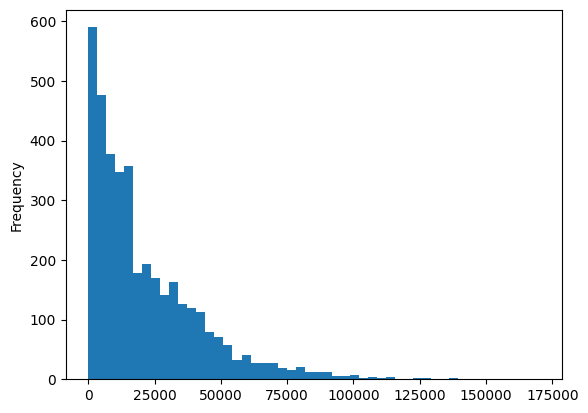

In [30]:
df['mileage'].plot.hist(bins=50)

In [31]:
df[df['mileage'] > 125000]

,year,price,transmission,mileage,fuelType,engineSize
3001,2014,10393.0,Automatic,140000.0,Diesel,2.1
3002,2015,10791.0,Manual,129000.0,Diesel,2.1
3008,2016,11393.0,Automatic,128000.0,Diesel,2.1
3009,2015,8692.0,Manual,150000.0,Diesel,2.1
3302,2015,12995.0,Automatic,131790.0,Hybrid,2.1
3316,2015,10795.0,Automatic,136760.0,Hybrid,2.1
3377,2010,4294.0,Manual,137291.0,Diesel,2.1
3442,2012,5250.0,Automatic,170000.0,Diesel,2.1


Nada errado aqui, manter como está

#### `price`

<Axes: ylabel='Frequency'>

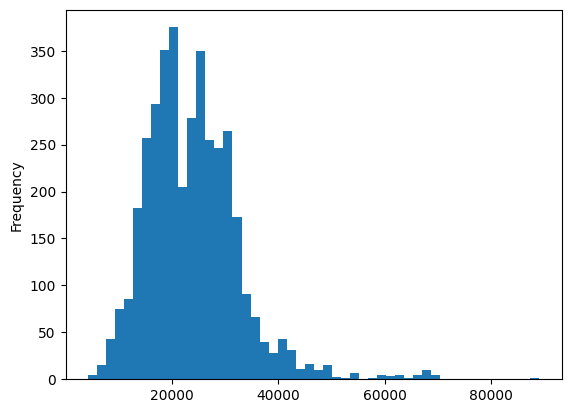

In [32]:
df['price'].plot.hist(bins=50)

In [33]:
df[df['price'] > 65000].sort_values(by='price', ascending=False)

,year,price,transmission,mileage,fuelType,engineSize
2765,2019,88995.0,Semi-Auto,200.0,Petrol,4.0
564,2020,69995.0,Semi-Auto,250.0,Petrol,4.0
1666,2019,69950.0,Automatic,1079.0,Petrol,4.0
2664,2019,69679.0,Semi-Auto,1000.0,Petrol,4.0
2181,2019,69399.0,Semi-Auto,1615.0,Petrol,4.0
3856,2020,68995.0,Automatic,2000.0,Petrol,4.0
2386,2019,68399.0,Semi-Auto,1282.0,Petrol,4.0
325,2020,67999.0,Semi-Auto,1500.0,Petrol,4.0
818,2019,67980.0,Semi-Auto,3456.0,Petrol,4.0
1028,2019,67940.0,Automatic,237.0,Petrol,4.0


Nada errado aqui, à exceção de alguem que quer vender seu carro por um preço exorbitante, essas coisas acontecem. Nada a ser feito nesta coluna.

## Embaralhando e gravando os dados

Vamos embaralhar os dados para evitar viéses de ordenação das amostras na hora de construir nosso modelo. Claro que o scikit-learn já embaralha os dados no `train_test_split`, mas por precaução faremos o embaralhamento também.

In [34]:
RANDOM_SEED=42

df = df.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)

In [35]:
df.to_csv('cclass_cleaned.csv', index=False)

## Considerações finais

- Nosso modelo vai funcionar apenas para automóveis do modelo "classe C" da Mercedes

- Apenas transmissões dos tipos `Semi-Auto`, `Automatic` e `Manual` são permitidas

- Apenas combustíveis dos tipos `Diesel`, `Petrol`, `Hybrid` são permitidos

- O modelo servirá apenas para veículos de 2010 em diante.